### Snippets from the chapter on Pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
data = np.random.randint(1,1001, size = (10,3))

data

array([[753,  73, 215],
       [642, 935, 936],
       [670, 693, 410],
       [330,  67,  20],
       [477, 967, 203],
       [469, 309, 238],
       [988,  70, 165],
       [567, 589, 427],
       [976, 274, 527],
       [398,  99, 297]])

In [91]:
df = pd.DataFrame ( data)
df

,0,1,2
0,753,73,215
1,642,935,936
2,670,693,410
3,330,67,20
4,477,967,203
5,469,309,238
6,988,70,165
7,567,589,427
8,976,274,527
9,398,99,297


In [92]:
df = pd.DataFrame(data, columns=['A', 'B', 'C'], index=list('abcdefghij'))

df

,A,B,C
a,753,73,215
b,642,935,936
c,670,693,410
d,330,67,20
e,477,967,203
f,469,309,238
g,988,70,165
h,567,589,427
i,976,274,527
j,398,99,297


In [93]:
print(df.index) #index object also operates like an array in many ways

print(df.index.size, "\n", df.index.shape, "\n", df.index.ndim, "\n", df.index.dtype)

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object')
10 
 (10,) 
 1 
 object


One difference between index and array objects is that index is immutable

In [94]:
df

,A,B,C
a,753,73,215
b,642,935,936
c,670,693,410
d,330,67,20
e,477,967,203
f,469,309,238
g,988,70,165
h,567,589,427
i,976,274,527
j,398,99,297


'a', 'b' etc are called explicit indices
While 0, 1, 2 here would be implicit indices

In [95]:
df['a':'c']

#slicing an index with explicit index, the final index 'c' is included

,A,B,C
a,753,73,215
b,642,935,936
c,670,693,410


In [96]:
df[0:2]

#slicing an index with implicit index, the final index '2' is NOT included

,A,B,C
a,753,73,215
b,642,935,936


In [97]:
new_series=pd.Series(np.arange(0,6), index=list('012345'))

new_series

0    0
1    1
2    2
3    3
4    4
5    5
dtype: int32

In [98]:
new_series[2] #indexing uses explicit indices

2

In [99]:
new_series[2:4] #in this case even though explicit and implict indices are the same, slicing uses implicit indices

2    2
3    3
dtype: int32

To avoid the above implicit / explicit confusion, loc and iloc are provided

loc - explicit index
iloc - implicit index

In [100]:
# Let's try loc and iloc to see the difference

df

,A,B,C
a,753,73,215
b,642,935,936
c,670,693,410
d,330,67,20
e,477,967,203
f,469,309,238
g,988,70,165
h,567,589,427
i,976,274,527
j,398,99,297


In [101]:
df.loc['a':'c'] #explicit indices used for slicing. Also the recors for index 'c' are included in the results

,A,B,C
a,753,73,215
b,642,935,936
c,670,693,410


In [ ]:
df.iloc['a':'c'] #this will throw error because iloc uses only implicit indices

In [105]:
df.iloc[0:2] #implicit indices with iloc. Results don't include the results for index '2'

,A,B,C
a,753,73,215
b,642,935,936


In [106]:
 df.loc['a'] #explicit

A    753
B     73
C    215
Name: a, dtype: int32

In [107]:
df.iloc[0] #implicit

A    753
B     73
C    215
Name: a, dtype: int32

"One guiding principle of Python code is that explicit is better than implicit"

In [108]:
df

,A,B,C
a,753,73,215
b,642,935,936
c,670,693,410
d,330,67,20
e,477,967,203
f,469,309,238
g,988,70,165
h,567,589,427
i,976,274,527
j,398,99,297


In [109]:
df['A'] #dictionary-style indexing

a    753
b    642
c    670
d    330
e    477
f    469
g    988
h    567
i    976
j    398
Name: A, dtype: int32

In [110]:
df.A #attribute-style indexing

a    753
b    642
c    670
d    330
e    477
f    469
g    988
h    567
i    976
j    398
Name: A, dtype: int32

Both are actually the same way of accessing a dictionary. However, if column names are not string or if column names conflict methods of the DataFrame, this attribute-style access is not possible. For example if a column is named "count", but count is also a method, hence it will cause conflict. Hence, it is better to use df['Count'] i.e. dictionary-style indexing

Also, column assignment should be done with dictionary-style rather than attribute style:
data['pop'] = z but NOT data.pop = z

In [111]:
A = pd.Series([2,4,6], index=[0,1,2])
B = pd.Series([1,3,5], index=[1,2,3])

print(A)
print(B)

A+B

0    2
1    4
2    6
dtype: int64
1    1
2    3
3    5
dtype: int64


0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [112]:
# If using NaN (Not a Number) is not the desired behaviour, we can modify the fill value using

A.add(B, fill_value=0) #i.e. use 0 for missing values against every index

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [113]:
A = pd.DataFrame( np.random.randint(1, 100, size=(3,4)))
A

,0,1,2,3
0,42,82,67,46
1,98,51,61,8
2,60,1,22,48


In [114]:
A.mean() #returns average of each column

0    66.666667
1    44.666667
2    50.000000
3    34.000000
dtype: float64

In [115]:
A.stack().mean() #returns average of all the values

48.833333333333336

In [116]:
A

,0,1,2,3
0,42,82,67,46
1,98,51,61,8
2,60,1,22,48


In [117]:
B

1    1
2    3
3    5
dtype: int64

In [118]:
A+B

,0,1,2,3
0,NaN,83.0,70.0,51.0
1,NaN,52.0,64.0,13.0
2,NaN,2.0,25.0,53.0


In [119]:
arr = np.array([1,2,3,np.nan, 4])

arr

array([ 1.,  2.,  3., nan,  4.])

In [120]:
arr.sum(), arr.min()

(nan, nan)

In [121]:
np.nansum(arr), np.nanmin(arr)

(10.0, 1.0)

In [122]:
df

,A,B,C
a,753,73,215
b,642,935,936
c,670,693,410
d,330,67,20
e,477,967,203
f,469,309,238
g,988,70,165
h,567,589,427
i,976,274,527
j,398,99,297


In [124]:
df.loc['a','B']=0

In [125]:
df

,A,B,C
a,753,0,215
b,642,935,936
c,670,693,410
d,330,67,20
e,477,967,203
f,469,309,238
g,988,70,165
h,567,589,427
i,976,274,527
j,398,99,297


In [126]:
df.isnull()

,A,B,C
a,False,False,False
b,False,False,False
c,False,False,False
d,False,False,False
e,False,False,False
f,False,False,False
g,False,False,False
h,False,False,False
i,False,False,False
j,False,False,False


In [127]:
data_new = pd.Series([1,2,3,np.nan, 'hello', None])

data_new

0        1
1        2
2        3
3      NaN
4    hello
5     None
dtype: object

In [128]:
data_new.isnull()

0    False
1    False
2    False
3     True
4    False
5     True
dtype: bool

In [129]:
data_new[data_new.isnull()]

3     NaN
5    None
dtype: object

In [130]:
data_new[data_new.notnull()]

0        1
1        2
2        3
4    hello
dtype: object

In [134]:
pd1 = pd.DataFrame([[1, 2, np.nan], [np.nan, 5, 6], [77, 66, 55]])

pd1

,0,1,2
0,1.0,2,NaN
1,NaN,5,6.0
2,77.0,66,55.0


In [141]:
pd1.dropna() # by default, dropna() will drop all the rows in which any null value is present

,0,1,2
2,77.0,66,55.0


In [136]:
pd1

,0,1,2
0,1.0,2,NaN
1,NaN,5,6.0
2,77.0,66,55.0


In [142]:
pd1.dropna(axis=0, how='any') #drops any row with NaN value

,0,1,2
2,77.0,66,55.0


In [143]:
pd1.dropna(axis=1, how='any') #drops any column with NaN value

,1
0,2
1,5
2,66


In [144]:
pd1.dropna(axis=0, how='all') # drops a row only if ALL values are NaN

,0,1,2
0,1.0,2,NaN
1,NaN,5,6.0
2,77.0,66,55.0


In [145]:
# For finer control, 'thresh' parameter lets you specify a minimum number of non-null values for the row/column to be kept

pd1.dropna(axis=0, thresh=3) # minimum 3 non-nan values needed in a row

,0,1,2
2,77.0,66,55.0


In [148]:
pd1.dropna(axis=1, thresh=2) # minimum 2 non-nan vaalues required in a column

,0,1,2
0,1.0,2,NaN
1,NaN,5,6.0
2,77.0,66,55.0


In [149]:
pd1.fillna(0)

,0,1,2
0,1.0,2,0.0
1,0.0,5,6.0
2,77.0,66,55.0


In [151]:
pd1.fillna(method='ffill') # filling cells forward from one row to another row

,0,1,2
0,1.0,2,NaN
1,1.0,5,6.0
2,77.0,66,55.0


In [153]:
pd1

,0,1,2
0,1.0,2,NaN
1,NaN,5,6.0
2,77.0,66,55.0


In [152]:
pd1.fillna(axis=1, method='bfill') # filling the NaN values by backward fill method for each column

,0,1,2
0,1.0,2.0,NaN
1,5.0,5.0,6.0
2,77.0,66.0,55.0


### Multi-index / hierarchical index

In [154]:
index = [('California', 2000), ('California', 2010), ('New York', 2000), ('New York', 2010), ('Texas', 2000), ('Texas', 2010)]

In [155]:
index

[('California', 2000),
 ('California', 2010),
 ('New York', 2000),
 ('New York', 2010),
 ('Texas', 2000),
 ('Texas', 2010)]

In [156]:
index = pd.MultiIndex.from_tuples(index)

index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           codes=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [157]:
populations = [1234,5678,4321,2636, 9928, 3532]

In [158]:
pop = pd.Series(populations, index=index)

pop

California  2000    1234
            2010    5678
New York    2000    4321
            2010    2636
Texas       2000    9928
            2010    3532
dtype: int64

In [ ]:
# reindex command can be created to re-create the index

In [199]:
pop['Texas']

Year
2000    9928
2010    3532
dtype: int64

In [200]:
pop.loc['New York':'Texas']

State     Year
New York  2000    4321
          2010    2636
Texas     2000    9928
          2010    3532
dtype: int64

In [201]:
pop>4500

State       Year
California  2000    False
            2010     True
New York    2000    False
            2010    False
Texas       2000     True
            2010    False
dtype: bool

In [202]:
pop[pop>4500]

State       Year
California  2010    5678
Texas       2000    9928
dtype: int64

In [203]:
pop[['California', 'New York']]

State       Year
California  2000    1234
            2010    5678
New York    2000    4321
            2010    2636
dtype: int64

In [160]:
pop[:,2010]

California    5678
New York      2636
Texas         3532
dtype: int64

In [164]:
pop['California', 2010]

5678

In [174]:
pop.loc[('California','Texas'), 2010]

California  2010    5678
Texas       2010    3532
dtype: int64

In [173]:
pop.loc['California':'Texas']

California  2000    1234
            2010    5678
New York    2000    4321
            2010    2636
Texas       2000    9928
            2010    3532
dtype: int64

In [175]:
pop.loc[slice('California', 'Texas'), slice(None)]

California  2000    1234
            2010    5678
New York    2000    4321
            2010    2636
Texas       2000    9928
            2010    3532
dtype: int64

In [176]:
pop.loc[slice('California', 'New York'), slice(None)]

California  2000    1234
            2010    5678
New York    2000    4321
            2010    2636
dtype: int64

In [177]:
pop.loc[slice('California', 'Texas'), slice(2000)]

California  2000    1234
New York    2000    4321
Texas       2000    9928
dtype: int64

In [180]:
pop.loc[slice('California', 'Texas'), slice(2000, 2010)]

California  2000    1234
            2010    5678
New York    2000    4321
            2010    2636
Texas       2000    9928
            2010    3532
dtype: int64

In [181]:
pop.loc[slice(None), slice(2010)]

California  2000    1234
            2010    5678
New York    2000    4321
            2010    2636
Texas       2000    9928
            2010    3532
dtype: int64

In [182]:
pop.loc[slice(None), slice(2000)]

California  2000    1234
New York    2000    4321
Texas       2000    9928
dtype: int64

In [184]:
# unstack() method converst a multi-indexed Series into a conventionally indexed Data Frame

pop

California  2000    1234
            2010    5678
New York    2000    4321
            2010    2636
Texas       2000    9928
            2010    3532
dtype: int64

In [185]:
pop_df = pop.unstack()

pop_df

,2000,2010
California,1234,5678
New York,4321,2636
Texas,9928,3532


Multi-indexes can be created using:
MultiIndex.from_arrays, from_tuples, from_product etc.

In [189]:
# creating multi-index directly

temp=pd.MultiIndex ( levels = [['a', 'b'], [1,2]],
                codes=[[0,0,1,1], [0,1,0,1]]
              
              )

temp

MultiIndex(levels=[['a', 'b'], [1, 2]],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [190]:
pop


California  2000    1234
            2010    5678
New York    2000    4321
            2010    2636
Texas       2000    9928
            2010    3532
dtype: int64

In [191]:
# giving names to the different index levels

pop.index.names = ['State', 'Year']

pop

State       Year
California  2000    1234
            2010    5678
New York    2000    4321
            2010    2636
Texas       2000    9928
            2010    3532
dtype: int64

#### Creating multi indexed columns

In [193]:
index = pd.MultiIndex.from_product(
                                    [[2013, 2014], [1, 2]], 
                                    names = ['Year', 'Visit']
                                    )

index

MultiIndex(levels=[[2013, 2014], [1, 2]],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]],
           names=['Year', 'Visit'])

In [194]:
columns = pd.MultiIndex.from_product(
                                    [['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                    names = ['Subject', 'Type']
)

columns

MultiIndex(levels=[['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
           codes=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]],
           names=['Subject', 'Type'])

In [196]:
data = np.random.randint(30, 40, size=(4,6))

data

array([[36, 33, 33, 32, 38, 34],
       [39, 34, 37, 37, 39, 31],
       [35, 37, 34, 33, 35, 33],
       [36, 36, 36, 35, 35, 38]])

In [197]:
df = pd.DataFrame(data, index = index, columns = columns)

df

Subject    Bob      Guido      Sue     
Type        HR Temp    HR Temp  HR Temp
Year Visit                             
2013 1      36   33    33   32  38   34
     2      39   34    37   37  39   31
2014 1      35   37    34   33  35   33
     2      36   36    36   35  35   38

This is called a 4-dimensional data

In [198]:
df['Bob']

Type        HR  Temp
Year Visit          
2013 1      36    33
     2      39    34
2014 1      35    37
     2      36    36

In [204]:
df['Bob', 'HR']

Year  Visit
2013  1        36
      2        39
2014  1        35
      2        36
Name: (Bob, HR), dtype: int32

In [207]:
df.iloc[:1, :2]

Subject    Bob     
Type        HR Temp
Year Visit         
2013 1      36   33

In [208]:
df.iloc[:3, :2]

Subject    Bob     
Type        HR Temp
Year Visit         
2013 1      36   33
     2      39   34
2014 1      35   37

In [209]:
df.loc[:, ('Guido', 'Temp')]

Year  Visit
2013  1        32
      2        37
2014  1        33
      2        35
Name: (Guido, Temp), dtype: int32

In [211]:
df

Subject    Bob      Guido      Sue     
Type        HR Temp    HR Temp  HR Temp
Year Visit                             
2013 1      36   33    33   32  38   34
     2      39   34    37   37  39   31
2014 1      35   37    34   33  35   33
     2      36   36    36   35  35   38

In [212]:
# slicing using idx

idx = pd.IndexSlice

df.loc[ idx[:, 1], idx[:, 'Temp'] ]

,Subject,Bob,Guido,Sue
,Type,Temp,Temp,Temp
Year,Visit,,,
2013,1,33,32,34
2014,1,37,33,33


In [220]:
df

Subject    Bob      Guido      Sue     
Type        HR Temp    HR Temp  HR Temp
Year Visit                             
2013 1      36   33    33   32  38   34
     2      39   34    37   37  39   31
2014 1      35   37    34   33  35   33
     2      36   36    36   35  35   38

In [213]:
df.loc[ idx[:, 1], idx[:, 'HR']  ]

,Subject,Bob,Guido,Sue
,Type,HR,HR,HR
Year,Visit,,,
2013,1,36,33,38
2014,1,35,34,35


In [219]:
df.loc[ idx[:, 2], idx[:, 'HR']  ]

,Subject,Bob,Guido,Sue
,Type,HR,HR,HR
Year,Visit,,,
2013,2,39,37,39
2014,2,36,36,35


In [221]:
df.loc[ idx[2013, 2], idx[:, 'HR']  ]

Subject  Type
Bob      HR      39
Guido    HR      37
Sue      HR      39
Name: (2013, 2), dtype: int32

In [222]:
df.loc[ idx[2013, 2], idx['Bob', 'HR']  ]

39

In [223]:
df.loc[ idx[2013, 2], idx['Bob':'Guido', 'HR']  ]

Subject  Type
Bob      HR      39
Guido    HR      37
Name: (2013, 2), dtype: int32

In [224]:
df.loc[ idx[2013, 2], idx['Guido':'Bob', 'HR']  ] #indexes not mentioned in correct order, hence no results given

Series([], Name: (2013, 2), dtype: int32)

In [225]:
df.loc[ idx[2013, 2], idx['Guido':'Sue', 'HR']  ]

Subject  Type
Guido    HR      37
Sue      HR      39
Name: (2013, 2), dtype: int32

In [218]:
df.loc[ idx[:, 2], idx[:, :]  ]

Subject    Bob      Guido      Sue     
Type        HR Temp    HR Temp  HR Temp
Year Visit                             
2013 2      39   34    37   37  39   31
2014 2      36   36    36   35  35   38

In [226]:
df.loc[ idx[:, 1:2], idx[:, :]  ]

Subject    Bob      Guido      Sue     
Type        HR Temp    HR Temp  HR Temp
Year Visit                             
2013 1      36   33    33   32  38   34
     2      39   34    37   37  39   31
2014 1      35   37    34   33  35   33
     2      36   36    36   35  35   38

In [227]:
df.loc[ idx[2014, 1:2], idx[:, :]  ]

Subject    Bob      Guido      Sue     
Type        HR Temp    HR Temp  HR Temp
Year Visit                             
2014 1      35   37    34   33  35   33
     2      36   36    36   35  35   38

Many of the MultiIndex slicing operations will fail if the index is not sorted

In [229]:
index = pd.MultiIndex.from_product([['a','c','b'], [1,2]])

data = pd.Series(np.random.rand(6), index = index)

data.index.names = ['Char', 'Integer']

data

Char  Integer
a     1          0.191567
      2          0.303236
c     1          0.577233
      2          0.131639
b     1          0.627121
      2          0.430774
dtype: float64

In [230]:
data['a']

Integer
1    0.191567
2    0.303236
dtype: float64

In [ ]:
data['a':'c'] # this will give error because of index not sorted

data['a':'b'] # this will give error because of index not sorted

In [232]:
# Partial slices and other siilar operations required the levels in the MultiIndex to be sorted
# sort_index() and sortlevel() can be used

data = data.sort_index()

data

Char  Integer
a     1          0.191567
      2          0.303236
b     1          0.627121
      2          0.430774
c     1          0.577233
      2          0.131639
dtype: float64

In [233]:
data['a':'c']

Char  Integer
a     1          0.191567
      2          0.303236
b     1          0.627121
      2          0.430774
c     1          0.577233
      2          0.131639
dtype: float64

In [234]:
data['a':'b']

Char  Integer
a     1          0.191567
      2          0.303236
b     1          0.627121
      2          0.430774
dtype: float64

Stacking and un-Stacking multi-indexed dataset

In [235]:
pop

State       Year
California  2000    1234
            2010    5678
New York    2000    4321
            2010    2636
Texas       2000    9928
            2010    3532
dtype: int64

In [236]:
pop.unstack(level=0)

State,California,New York,Texas
Year,,,
2000,1234,4321,9928
2010,5678,2636,3532


In [237]:
pop.unstack(level=1)

Year,2000,2010
State,,
California,1234,5678
New York,4321,2636
Texas,9928,3532


In [240]:
pop.unstack().stack() #stack re-stacks the indexes

State       Year
California  2000    1234
            2010    5678
New York    2000    4321
            2010    2636
Texas       2000    9928
            2010    3532
dtype: int64

In [241]:
pop

State       Year
California  2000    1234
            2010    5678
New York    2000    4321
            2010    2636
Texas       2000    9928
            2010    3532
dtype: int64

In [243]:
pop_flat = pop.reset_index() # another way to convert indexes to columns

pop_flat

,State,Year,0
0,California,2000,1234
1,California,2010,5678
2,New York,2000,4321
3,New York,2010,2636
4,Texas,2000,9928
5,Texas,2010,3532


In [245]:
# To create a multi-index we can use set_index()

pop_flat.set_index(['State','Year'])

0
State      Year      
California 2000  1234
           2010  5678
New York   2000  4321
           2010  2636
Texas      2000  9928
           2010  3532

Data aggregation on multi-indices

In [246]:
df

Subject    Bob      Guido      Sue     
Type        HR Temp    HR Temp  HR Temp
Year Visit                             
2013 1      36   33    33   32  38   34
     2      39   34    37   37  39   31
2014 1      35   37    34   33  35   33
     2      36   36    36   35  35   38

In [251]:
df.mean(level = 'Year')

Subject   Bob       Guido         Sue      
Type       HR  Temp    HR  Temp    HR  Temp
Year                                       
2013     37.5  33.5  35.0  34.5  38.5  32.5
2014     35.5  36.5  35.0  34.0  35.0  35.5

In [252]:
df.mean(level = 'Visit')

Subject   Bob       Guido         Sue      
Type       HR  Temp    HR  Temp    HR  Temp
Visit                                      
1        35.5  35.0  33.5  32.5  36.5  33.5
2        37.5  35.0  36.5  36.0  37.0  34.5

In [250]:
df

Subject    Bob      Guido      Sue     
Type        HR Temp    HR Temp  HR Temp
Year Visit                             
2013 1      36   33    33   32  38   34
     2      39   34    37   37  39   31
2014 1      35   37    34   33  35   33
     2      36   36    36   35  35   38

In [254]:
df.mean(axis=1, level = 'Subject') # mean across the columns. This means any other index at the column- level
                                   # apart from 'Subject' will be collapsed

Subject      Bob  Guido   Sue
Year Visit                   
2013 1      34.5   32.5  36.0
     2      36.5   37.0  35.0
2014 1      36.0   33.5  34.0
     2      36.0   35.5  36.5

In [255]:
df.mean(axis=1, level='Type')

Type               HR       Temp
Year Visit                      
2013 1      35.666667  33.000000
     2      38.333333  34.000000
2014 1      34.666667  34.333333
     2      35.666667  36.333333

In [258]:
a = pd.DataFrame( np.random.randint(1,100, size=(3,2) ) )
a

,0,1
0,57,71
1,76,40
2,79,43


In [259]:
b = pd.DataFrame ( np.random.randint(1,100, size=(2,4)))
b

,0,1,2,3
0,33,26,14,33
1,7,96,66,96


In [262]:
pd.concat([a,b]) # default concatenation takes row-wise

# also as you can see in the results, the original indices are preserved!
# Indices are not preserved in np.concatenate

,0,1,2,3
0,57,71,NaN,NaN
1,76,40,NaN,NaN
2,79,43,NaN,NaN
0,33,26,14.0,33.0
1,7,96,66.0,96.0


In [264]:
pd.concat([a,b], axis=1) # concatenation column-wise

,0,1,0,1,2,3
0,57,71,33.0,26.0,14.0,33.0
1,76,40,7.0,96.0,66.0,96.0
2,79,43,NaN,NaN,NaN,NaN


In [ ]:
# To avoid concatenation if indices are duplicates, use verify_integrity flag

pd.concat([a,b], verify_integrity=True)

# This will give error: Indexes have overlapping values

In [271]:
# Ignoring the index. This will create a new index

pd.concat([a,b], ignore_index=True)

,0,1,2,3
0,57,71,NaN,NaN
1,76,40,NaN,NaN
2,79,43,NaN,NaN
3,33,26,14.0,33.0
4,7,96,66.0,96.0


In [273]:
# Another way while concatenating is to add respective labels to the data

pd.concat([a,b], keys=['a','b'])

# This way you can differentiate which data is from 'a' dataset and which is from 'b' dataset

0   1     2     3
a 0  57  71   NaN   NaN
  1  76  40   NaN   NaN
  2  79  43   NaN   NaN
b 0  33  26  14.0  33.0
  1   7  96  66.0  96.0

Joins

In [274]:
a

,0,1
0,57,71
1,76,40
2,79,43


In [275]:
b

,0,1,2,3
0,33,26,14,33
1,7,96,66,96


In [276]:
pd.concat([a,b], join='inner')

,0,1
0,57,71
1,76,40
2,79,43
0,33,26
1,7,96


In [279]:
pd.concat([a,b], join_axes=[a.columns])

# This specifies that join should occur only for columns of dataset 'a'

,0,1
0,57,71
1,76,40
2,79,43
0,33,26
1,7,96


In [280]:
pd.concat([a,b], join_axes=[b.columns])

,0,1,2,3
0,57,71,NaN,NaN
1,76,40,NaN,NaN
2,79,43,NaN,NaN
0,33,26,14.0,33.0
1,7,96,66.0,96.0


In [281]:
a.append(b)

,0,1,2,3
0,57,71,NaN,NaN
1,76,40,NaN,NaN
2,79,43,NaN,NaN
0,33,26,14.0,33.0
1,7,96,66.0,96.0


In [282]:
'''
Unlike the append() and extend() methods of Python lists, the append() method in Pandas does not modify the original object.
Instead, it creates a new object with the combined data. It also is not a very efficient method, because it involves
creation of a new index and data buffer.
This, if you plan to do mutliple append operations, it is generally better to build a list of DataFrames
and pass them all at once to the concat function.
'''

'\nUnlike the append() and extend() methods of Python lists, the append() method in Pandas does not modify the original object.\nInstead, it creates a new object with the combined data. It also is not a very efficient method, because it involves\ncreation of a new index and data buffer.\nThis, if you plan to do mutliple append operations, it is generally better to build a list of DataFrames\nand pass them all at once to the concat function.\n'

In [286]:
# Pandas offers high-performance in-memory join operations thorugh pd.merge function

# pd.merge() offers one to one, many to one, many to many joins

df1 = pd.DataFrame({'employee':['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']
                   })

df2=pd.DataFrame({'employee':['Lisa','Bob','Jake','Sue'],
                  'hire date':[2004, 2008, 2012, 2014]
                 })

print(df1)
print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [288]:
df3=pd.merge(df1, df2) # one to one join. Merge generally discards the index except in the case of merge by index

df3

,employee,group,hire date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [290]:
df4 = pd.DataFrame({
'group':['Accounting', 'Engineering', 'HR'],
'supervisor':['John', 'Adams', 'Tony']
})

df4

,group,supervisor
0,Accounting,John
1,Engineering,Adams
2,HR,Tony


In [291]:
pd.merge(df3, df4) # many to one join as supervisor info is repeated in more than one location

,employee,group,hire date,supervisor
0,Bob,Accounting,2008,John
1,Jake,Engineering,2012,Adams
2,Lisa,Engineering,2004,Adams
3,Sue,HR,2014,Tony


In [292]:
df5 = pd.DataFrame({
    'group':['Accounting', 'Engineering', 'HR', 'Accounting', 'Engineering', 'HR'],
    'skills':['math', 'coding', 'spreadsheets', 'spreadsheets', 'Python', 'organization']
})

df5

,group,skills
0,Accounting,math
1,Engineering,coding
2,HR,spreadsheets
3,Accounting,spreadsheets
4,Engineering,Python
5,HR,organization


In [293]:
pd.merge(df1, df5)

# many to many merge as the key column in both the data-sets contains duplicates

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,Python
4,Lisa,Engineering,coding
5,Lisa,Engineering,Python
6,Sue,HR,spreadsheets
7,Sue,HR,organization


In [296]:
pd.merge(df1,df2, on='employee') # 'employee' column should be common

,employee,group,hire date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [297]:
# merging when there is no common column-name

df6 = pd.DataFrame({'name':['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary':[700,800,850,650]
})

df6

,name,salary
0,Bob,700
1,Jake,800
2,Lisa,850
3,Sue,650


In [298]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [300]:
pd.merge(df1,df6, left_on='employee', right_on='name')

#this by default keeps both the columns as you can see in the results

,employee,group,name,salary
0,Bob,Accounting,Bob,700
1,Jake,Engineering,Jake,800
2,Lisa,Engineering,Lisa,850
3,Sue,HR,Sue,650


In [301]:
pd.merge(df1, df6, left_on='employee', right_on='name').drop('name', axis=1)

# dropping the extra column

,employee,group,salary
0,Bob,Accounting,700
1,Jake,Engineering,800
2,Lisa,Engineering,850
3,Sue,HR,650


Merging on Index

In [302]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [307]:
df1_byindex = df1.set_index('employee')

df1_byindex

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR


In [306]:
df2

,employee,hire date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [308]:
df2_byindex = df2.set_index('employee')

df2_byindex

,hire date
employee,
Lisa,2004
Bob,2008
Jake,2012
Sue,2014


In [309]:
pd.merge(df1_byindex, df2_byindex, left_index=True, right_index=True)

,group,hire date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [310]:
# The join() method does the same as above i.e. performs a merge on indices

df1_byindex.join(df2_byindex)

,group,hire date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [314]:
# Mixing index and columns

print(df1_byindex)
print(df6)

pd.merge(df1_byindex, df6, left_index=True, right_on='name')

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
   name  salary
0   Bob     700
1  Jake     800
2  Lisa     850
3   Sue     650


,group,name,salary
0,Accounting,Bob,700
1,Engineering,Jake,800
2,Engineering,Lisa,850
3,HR,Sue,650


Overlapping column names

In [316]:
df1_new = pd.DataFrame({'name':['Nikhil','Ankit'], 'rank':[1,2]})
df2_new = pd.DataFrame({'name':['Nikhil','Ankit'], 'rank':[3,4]})

print(df1_new)
print(df2_new)

     name  rank
0  Nikhil     1
1   Ankit     2
     name  rank
0  Nikhil     3
1   Ankit     4


In [318]:
pd.merge(df1_new, df2_new, on='name')

# result includes _x and _y to differentiate between the data from the two datasets

,name,rank_x,rank_y
0,Nikhil,1,3
1,Ankit,2,4


In [319]:
pd.merge(df1_new, df2_new, on='name', suffixes=['_L', '_R'])

,name,rank_L,rank_R
0,Nikhil,1,3
1,Ankit,2,4


#### Example of analysis using US States data

In [323]:
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')

print(pop.head())
print(areas.head())
print(abbrevs.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


Task is to rankt US states and territories by their 2010 population density

In [324]:
# First let's merge pop and abbrevs

merged=pd.merge(pop, abbrevs, how='outer', left_on='state/region', right_on='abbreviation')

merged.head()

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.0,Alabama,AL
1,AL,total,2012,4817528.0,Alabama,AL
2,AL,under18,2010,1130966.0,Alabama,AL
3,AL,total,2010,4785570.0,Alabama,AL
4,AL,under18,2011,1125763.0,Alabama,AL


In [326]:
# drop the duplicate

merged = merged.drop('abbreviation', axis=1)

merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [327]:
# Let's check if there are any null values

merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [330]:
# The above shows that some of the Population and State entries are null. Let's see which ones

merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [331]:
# Seems like they belong to PR (Puerto Rico) before the year 2000

In [332]:
#Let us see which states are null

merged[merged['state'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [ ]:
# This means that for some entries, there was no corresponding entry in the 'abbrevs' table

In [335]:
# Now let's find the unique state entries

merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [ ]:
# This means that the dataset has entries for countries Puerto Rico and USA as well. And because they are not states,
# there corresponding entries were not there in 'abbrevs' dataset

In [337]:
# In our merged dataset, let's replace the NaN state values with some value for PR and USA

merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'

merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'

merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [338]:
# Now we have removed all the NaN values for the state column

In [339]:
# Let's visit our complete data-set again (we will skip pop and abbrevs as they are already available in 'merged')

print(merged.head())

print(areas.head())

  state/region     ages  year  population    state
0           AL  under18  2012   1117489.0  Alabama
1           AL    total  2012   4817528.0  Alabama
2           AL  under18  2010   1130966.0  Alabama
3           AL    total  2010   4785570.0  Alabama
4           AL  under18  2011   1125763.0  Alabama
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707


In [340]:
# So now we will merge 'areas' and 'merged' on the 'state' column which is common between them

final = pd.merge(merged, areas, on='state', how='left')

final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [341]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [343]:
final[final['area (sq. mi)'].isnull()].head()

,state/region,ages,year,population,state,area (sq. mi)
2496,USA,under18,1990,64218512.0,United States,NaN
2497,USA,total,1990,249622814.0,United States,NaN
2498,USA,total,1991,252980942.0,United States,NaN
2499,USA,under18,1991,65313018.0,United States,NaN
2500,USA,under18,1992,66509177.0,United States,NaN


In [344]:
final['state'][final['area (sq. mi)'].isnull()].head()

2496    United States
2497    United States
2498    United States
2499    United States
2500    United States
Name: state, dtype: object

In [345]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [346]:
# This shows that wherever state is United States, area is blank
# We can either sum up the areas of al individual states and put it in the United States entries
# Or we can just ignore and drop the null values as whole US area is not relevant to our task

In [347]:
final.dropna(inplace = True)

final.isnull().any()

state/region     False
ages             False
year             False
population       False
state            False
area (sq. mi)    False
dtype: bool

In [348]:
final.head() # Now we have all the data in the required format

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [350]:
data2010 = final.query(" year==2010 & ages=='total' ")

data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [351]:
# Let us now compute density for each state: population / area

# First, let's create a new index

data2010.set_index('state', inplace = True)

data2010.head()

,state/region,ages,year,population,area (sq. mi)
state,,,,,
Alabama,AL,total,2010,4785570.0,52423.0
Alaska,AK,total,2010,713868.0,656425.0
Arizona,AZ,total,2010,6408790.0,114006.0
Arkansas,AR,total,2010,2922280.0,53182.0
California,CA,total,2010,37333601.0,163707.0


In [352]:
density = data2010['population'] / data2010['area (sq. mi)']

type(density)

pandas.core.series.Series

In [353]:
density.head()

state
Alabama        91.287603
Alaska          1.087509
Arizona        56.214497
Arkansas       54.948667
California    228.051342
dtype: float64

In [354]:
density.sort_values(ascending = False, inplace = True)

density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [355]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

### Aggregation and Grouping

In [50]:
import seaborn as sns

planets = sns.load_dataset('planets') # planets data is in-built in the Seaborn package

In [357]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [358]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [366]:
planets.groupby('method')

In [367]:
planets.groupby('method').mean() # applies mean to all columns, even which don't make sense

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,1.000000,631.180000,NaN,17.875000,2011.500000
Eclipse Timing Variations,1.666667,4751.644444,5.125000,315.360000,2010.000000
Imaging,1.315789,118247.737500,NaN,67.715937,2009.131579
Microlensing,1.173913,3153.571429,NaN,4144.000000,2009.782609
Orbital Brightness Modulation,1.666667,0.709307,NaN,1180.000000,2011.666667
Pulsar Timing,2.200000,7343.021201,NaN,1200.000000,1998.400000
Pulsation Timing Variations,1.000000,1170.000000,NaN,NaN,2007.000000
Radial Velocity,1.721519,823.354680,2.630699,51.600208,2007.518987
Transit,1.954660,21.102073,1.470000,599.298080,2011.236776


In [369]:
planets.groupby('method')['orbital_period']

In [371]:
planets.groupby('method')['orbital_period'].median() # calculates median only for orbital_period column

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [376]:
planets.groupby('year')['method'].count()

year
1989      1
1992      2
1994      1
1995      1
1996      6
1997      1
1998      5
1999     15
2000     16
2001     12
2002     32
2003     25
2004     26
2005     39
2006     31
2007     53
2008     74
2009     98
2010    102
2011    185
2012    140
2013    118
2014     52
Name: method, dtype: int64

In [382]:
planets.groupby('year').aggregate([max])

,method,number,orbital_period,mass,distance
,max,max,max,max,max
year,,,,,
1989,Radial Velocity,1,83.888000,11.680,40.57
1992,Pulsar Timing,3,66.541900,NaN,NaN
1994,Pulsar Timing,3,98.211400,NaN,NaN
1995,Radial Velocity,1,4.230785,0.472,15.36
1996,Radial Velocity,5,1078.000000,3.900,21.41
1997,Radial Velocity,1,39.845000,1.040,17.43
1998,Radial Velocity,4,442.100000,8.020,47.92
1999,Radial Velocity,4,3810.000000,8.440,59.03


In [383]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [387]:
planets.groupby(planets['year']).sum().head(10) # this and below command are the same

,number,orbital_period,mass,distance
year,,,,
1989,1,83.888000,11.6800,40.57
1992,6,91.803900,0.0000,0.00
1994,3,98.211400,0.0000,0.00
1995,1,4.230785,0.4720,15.36
1996,15,2015.769933,7.9176,95.20
1997,1,39.845000,1.0400,17.43
1998,11,571.553306,13.4356,131.51
1999,24,8284.213789,45.3130,464.21
2000,27,8655.125170,50.8622,492.04


In [388]:
planets.groupby('year').sum().head(10)

,number,orbital_period,mass,distance
year,,,,
1989,1,83.888000,11.6800,40.57
1992,6,91.803900,0.0000,0.00
1994,3,98.211400,0.0000,0.00
1995,1,4.230785,0.4720,15.36
1996,15,2015.769933,7.9176,95.20
1997,1,39.845000,1.0400,17.43
1998,11,571.553306,13.4356,131.51
1999,24,8284.213789,45.3130,464.21
2000,27,8655.125170,50.8622,492.04


In [389]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().fillna(0)

method                         decade
Astrometry                     2010s       2
Eclipse Timing Variations      2000s       5
                               2010s      10
Imaging                        2000s      29
                               2010s      21
Microlensing                   2000s      12
                               2010s      15
Orbital Brightness Modulation  2010s       5
Pulsar Timing                  1990s       9
                               2000s       1
                               2010s       1
Pulsation Timing Variations    2000s       1
Radial Velocity                1980s       1
                               1990s      52
                               2000s     475
                               2010s     424
Transit                        2000s      64
                               2010s     712
Transit Timing Variations      2010s       9
Name: number, dtype: int64

In [391]:
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


#### Pivot Tables

In [393]:
titanic = sns.load_dataset('titanic')

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [394]:
titanic.groupby('sex')['survived'].mean() # gender-wise surivival

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [397]:
titanic.groupby(['sex', 'class'])['survived'].mean() # gender-wise and class-wise survival rates

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [398]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean')

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [399]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [400]:
# using Pivot table to achieve the above

titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [403]:
# adding another level to the index using pd.cut()

age_group = pd.cut(titanic['age'], [0, 18, 50, 80])

age_group.head()

0    (18, 50]
1    (18, 50]
2    (18, 50]
3    (18, 50]
4    (18, 50]
Name: age, dtype: category
Categories (3, interval[int64]): [(0, 18] < (18, 50] < (50, 80]]

In [404]:
titanic.pivot_table('survived', index = ['sex', age_group], columns = 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 50]  0.967213  0.912281  0.413793
       (50, 80]  1.000000  0.666667  1.000000
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 50]  0.442857  0.069444  0.139896
       (50, 80]  0.192308  0.083333  0.000000

In [406]:
# adding a quantile-cut using pd.qcut() to the columns

fare_group = pd.qcut(titanic['fare'], 2)

titanic.pivot_table('survived', index = ['sex', age_group], columns=['class', fare_group])

class                      First                             Second  \
fare            (-0.001, 14.454] (14.454, 512.329] (-0.001, 14.454]   
sex    age                                                            
female (0, 18]               NaN          0.909091         1.000000   
       (18, 50]              NaN          0.967213         0.916667   
       (50, 80]              NaN          1.000000         0.000000   
male   (0, 18]               NaN          0.800000         0.000000   
       (18, 50]              0.0          0.469697         0.095238   
       (50, 80]              NaN          0.192308         0.111111   

class                                        Third                    
fare            (14.454, 512.329] (-0.001, 14.454] (14.454, 512.329]  
sex    age                                                            
female (0, 18]           1.000000         0.714286          0.318182  
       (18, 50]          0.909091         0.428571          0.391304  
       (50, 80]          1.000000         1.000000               NaN  
male   (0, 18]           0.818182         0.260870          0.178571  
       (18, 50]          0.033333         0.131737          0.192308  
       (50, 80]          0.000000         0.000000               NaN

In [ ]:
# format of the pivot_table formula

DataFrame.pivot_table(self, values=None, index=None, columns=None, 
                      aggfunc='mean', fill_value=None, margins=False, dropna=True, 
                      margins_name='All', observed=False)

aggfunc is mean by default

Other options are sum, mean ,count, min, max etc.

In [408]:
# applying different aggfunc to different columns

titanic.pivot_table(index='sex', columns='class', aggfunc={'survived': sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [410]:
# Totals across each goruping are done by using 'margins' keyword

titanic.pivot_table('survived', index = 'sex', columns = 'class', margins = True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


### Example: US Births data

In [411]:
births = pd.read_csv('births.csv')

births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [412]:
# add a decade column

births['decade'] = 10 * (births['year'] //10)

births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [413]:
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0, 0.5, 'total births per year')

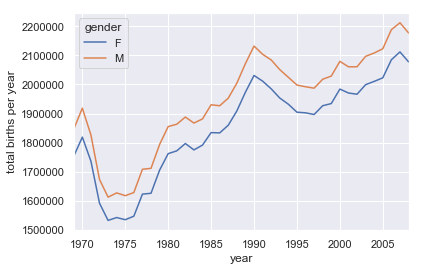

In [414]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()

plt.ylabel('total births per year')

### Vectorized strings operations

In [418]:
arr1 = ['peter', 'guido', 'mary']

[x.capitalize() for x in arr1]

['Peter', 'Guido', 'Mary']

In [419]:
arr2 = ['nikhil', 'ankit', None]

[x.capitalize() for x in arr2] #this fails because of "None" value in the array

AttributeError: 'NoneType' object has no attribute 'capitalize'

In [421]:
# But Pandas is able to handle data like None

names = pd.Series(arr2)
names

0    nikhil
1     ankit
2      None
dtype: object

In [422]:
names.str.capitalize()

0    Nikhil
1     Ankit
2      None
dtype: object

In [423]:
arr3 = ['nikhil sharma', 'ankit sharma', 'sharda sharma']

arr3_df = pd.Series(arr3)

In [425]:
arr3_df.str[0:3]

0    nik
1    ank
2    sha
dtype: object

In [426]:
arr3_df.str.split().str.get(-1)

0    sharma
1    sharma
2    sharma
dtype: object

In [429]:
new_df = pd.DataFrame({'name':arr3, 'info':['B|C', 'A|D', 'B|C|D']})

# A = likes A
# B = likes B
# ... so on ...

new_df

,name,info
0,nikhil sharma,B|C
1,ankit sharma,A|D
2,sharda sharma,B|C|D


In [430]:
new_df['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,0
1,1,0,0,1
2,0,1,1,1


#### Example: Recipes

In [4]:
try:
    recipes = pd.read_json('recipeitems-latest.json')
except ValueError as e:
    print("ValueError:", e)

ValueError: Trailing data


In [7]:
with open('recipeitems-latest.json') as f:
    line = f.readline()
pd.read_json(line).shape

(2, 12)

In [10]:
# read the entire file into a Python array
with open('recipeitems-latest.json', 'r', encoding='utf8') as f:
    # Extract each line
    data = (line.strip() for line in f)
    # Reformat so each line is the element of a list
    data_json = "[{0}]".format(','.join(data))
# read the result as a JSON
recipes = pd.read_json(data_json)

In [11]:
recipes.shape

(12624, 17)

In [12]:
type(recipes)

pandas.core.frame.DataFrame

In [13]:
recipes.head(2)

,_id,cookTime,creator,dateModified,datePublished,description,image,ingredients,name,prepTime,recipeCategory,recipeInstructions,recipeYield,source,totalTime,ts,url
0,{'$oid': '5160756b96cc62079cc2db15'},PT30M,NaN,NaN,2013-03-11,"Late Saturday afternoon, after Marlboro Man ha...",http://static.thepioneerwoman.com/cooking/file...,Biscuits\n3 cups All-purpose Flour\n2 Tablespo...,Drop Biscuits and Sausage Gravy,PT10M,NaN,NaN,12,thepioneerwoman,NaN,{'$date': 1365276011104},http://thepioneerwoman.com/cooking/2013/03/dro...
1,{'$oid': '5160756d96cc62079cc2db16'},PT20M,NaN,NaN,2013-03-13,"When I was growing up, I participated in my Ep...",http://static.thepioneerwoman.com/cooking/file...,12 whole Dinner Rolls Or Small Sandwich Buns (...,Hot Roast Beef Sandwiches,PT20M,NaN,NaN,12,thepioneerwoman,NaN,{'$date': 1365276013902},http://thepioneerwoman.com/cooking/2013/03/hot...


In [14]:
recipes.iloc[0]

_id                                {'$oid': '5160756b96cc62079cc2db15'}
cookTime                                                          PT30M
creator                                                             NaN
dateModified                                                        NaN
datePublished                                                2013-03-11
description           Late Saturday afternoon, after Marlboro Man ha...
image                 http://static.thepioneerwoman.com/cooking/file...
ingredients           Biscuits\n3 cups All-purpose Flour\n2 Tablespo...
name                                    Drop Biscuits and Sausage Gravy
prepTime                                                          PT10M
recipeCategory                                                      NaN
recipeInstructions                                                  NaN
recipeYield                                                          12
source                                                  thepione

In [15]:
recipes.ingredients.str.len().describe()

count    12624.000000
mean       309.432193
std        186.765976
min          0.000000
25%        180.000000
50%        270.000000
75%        400.000000
max       3247.000000
Name: ingredients, dtype: float64

In [17]:
# Longest ingredient list

recipes.name[np.argmax(recipes.ingredients.str.len())]

c:\users\public.desktop-6rbqt7l\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


'Braised Beef cheeks Recipe'

In [18]:
# Recipes for breakfast

recipes.description.str.contains('[Bb]reakfast').sum()

185

In [19]:
# Recipes with cinnamon

recipes.ingredients.str.contains('[Cc]innamon').sum()

921

#### Working with Time Series

In [20]:
from datetime import datetime

datetime(year = 2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [21]:
from dateutil import parser

date = parser.parse("4th of July, 2015")

date

datetime.datetime(2015, 7, 4, 0, 0)

In [22]:
date.strftime('%A')

'Saturday'

In [23]:
# Another related package for time-zones: pytz

In [24]:
date = np.array('2015-07-04', dtype=np.datetime64)

date

array('2015-07-04', dtype='datetime64[D]')

In [25]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [26]:
date = pd.to_datetime("4th of July, 2015")

date

Timestamp('2015-07-04 00:00:00')

In [27]:
date.strftime('%A')

'Saturday'

In [29]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [30]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])

data = pd.Series([0, 1, 2, 3], index=index)

data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [31]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [32]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

In [33]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [34]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [35]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [36]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [37]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [38]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [39]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [40]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [41]:
from pandas.tseries.offsets import BDay

pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

In [42]:
from pandas_datareader import data

In [46]:
yahoo = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='yahoo')

yahoo.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


In [48]:
yahoo = yahoo['Close']

In [49]:
yahoo.head()

Date
2004-08-19    49.982655
2004-08-20    53.952770
2004-08-23    54.495735
2004-08-24    52.239193
2004-08-25    52.802086
Name: Close, dtype: float64

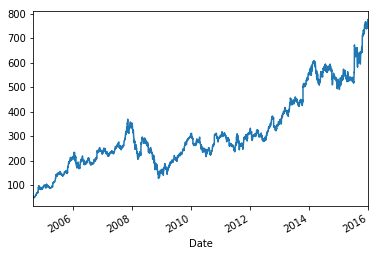

In [51]:
yahoo.plot()